In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines
import numpy as np
from micropyome.taxa import regression

In [15]:
def graph(results: dict, title: str):
    def smooth_curve(x, y):
        x_new = np.linspace(min(x), max(x), 300)
        spline = make_interp_spline(x, y, k=3)
        y_smooth = spline(x_new)
        return x_new, y_smooth

    plt.figure(figsize=(14, 7))

    # Define line styles and markers for each model
    line_styles = {
        'Random Forest': '--',       # Dashed line
        'Gradient Boosting': ':',    # Dotted line
        'Averill et al. 2021': '-.',       # Dash-dot line
        "k-NN": "-"
    }
    markers = {
        'Random Forest': 's',        # Square point
        'Gradient Boosting': 'o',    # Round point
        'Averill et al. 2021': '^',       # Triangle point
        "k-NN": "D"
    }

    # Plotting the models from r2_results.csv (lines)
    for model in results:
        x_values = np.arange(len(regression.TAXONOMIC_LEVELS))
        y_values = results[model]
        x_smooth, y_smooth = smooth_curve(x_values, y_values)
        plt.plot(x_smooth, y_smooth, line_styles[model], linewidth=1.5, label=model, color='black', zorder=1)

    # Plotting the models (markers on top)
    for model in results:
        y_values = results[model]
        marker_color = '0.42' if model in ('Gradient Boosting', 'k-NN') else 'black'
        plt.scatter(x_values, y_values, marker=markers[model], color=marker_color, s=150, zorder=2, linewidth=1.5)  # s controls size

    # Plotting the compared study (lines and markers)
    # y_values_compared = r2_results_compared_study_df.loc['Averill et al. method', regression.TAXONOMIC_LEVELS]
    # x_smooth, y_smooth = smooth_curve(x_values, y_values_compared)
    # plt.plot(x_smooth, y_smooth, line_styles['Averill et al. 2021'], linewidth=1.5, label='Averill et al. 2021', color='black', zorder=1)
    # plt.scatter(x_values, y_values_compared, marker=markers['Averill et al. 2021'], color='black', s=150, zorder=2, linewidth=1.5)

    # Create custom legend handles with increased marker and line sizes
    legend_handles = []
    for model in results:
        marker_color = '0.42' if model in ('Gradient Boosting', 'k-NN') else 'black'
        line = mlines.Line2D([], [], color='black', marker=markers[model],
                             linestyle=line_styles[model], markersize=15,  # Increase marker size
                             markeredgewidth=1, markerfacecolor=marker_color,
                             label=model, linewidth=1.5)  # Increase line width
        legend_handles.append(line)

    # Convert taxonomic level names to title case for x-axis labels
    #taxonomic_levels_title_case = [level.title() for level in taxonomic_levels]
    taxonomic_levels_title_case = ['Functional', 'Phylum', 'Class', 'Order', 'Family', 'Genus']

    plt.xticks(x_values, taxonomic_levels_title_case, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Taxonomic Level', fontsize=18)
    plt.ylabel(r'$R^2$ score', fontsize=18)
    plt.title(title, fontsize=20, pad=18)
    plt.legend(handles=legend_handles, loc='best', fontsize=16)
    plt.show()

# Bacteria

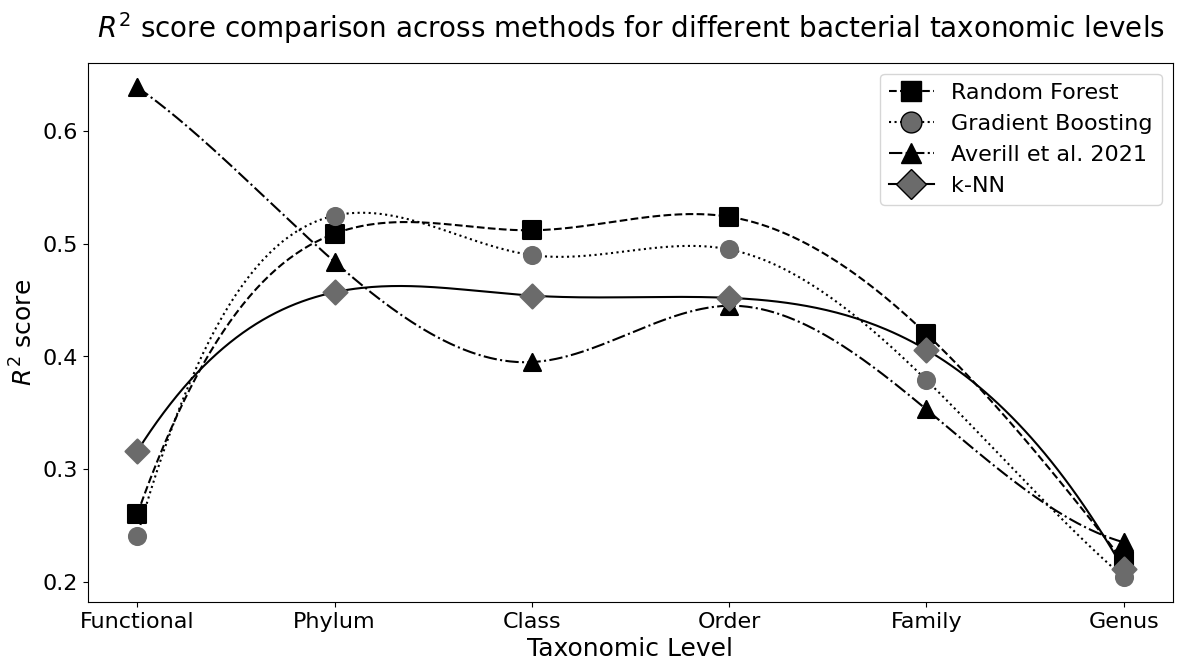

In [16]:
RESULTS = {
    "Random Forest": [0.260, 0.509, 0.512, 0.524, 0.420, 0.218],
    "Gradient Boosting": [0.241, 0.525, 0.490, 0.495, 0.379, 0.204],
    "Averill et al. 2021": [0.639, 0.484, 0.395, 0.445, 0.353, 0.235],
    "k-NN": [0.316, 0.457, 0.454, 0.452, 0.406, 0.211]
}

# k-NN:
# fg        20
# phylum    20
# class     10
# order     10
# family    20
# genus     10

graph(RESULTS, r'$R^2$ score comparison across methods for different bacterial taxonomic levels')

# Fungi

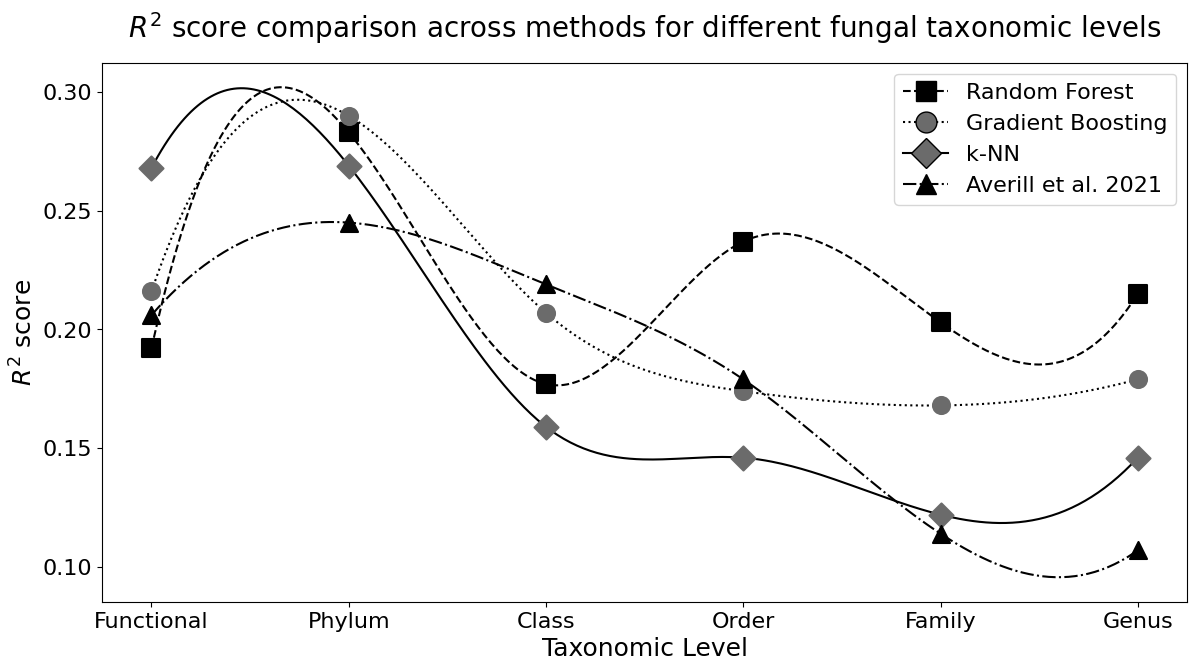

In [17]:
RESULTS = {
    "Random Forest": [0.192, 0.283, 0.177, 0.237, 0.203, 0.215],
    "Gradient Boosting": [0.216, 0.290, 0.207, 0.174, 0.168, 0.179],
    "k-NN": [0.268, 0.269, 0.159, 0.146, 0.122, 0.146],
    "Averill et al. 2021": [0.206, 0.245, 0.219, 0.179, 0.114, 0.107]
}

# k-NN:
# fg        10
# phylum    10
# class     20
# order     20
# family    20
# genus     20

graph(RESULTS, r'$R^2$ score comparison across methods for different fungal taxonomic levels')